In [1]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
import pandas as pd 
import numpy as np 
%matplotlib inline

In [3]:
x,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [4]:
x

array([[  1.67167365,  -3.49222315],
       [ -9.38959599,  -3.75410545],
       [-11.49562695,  -3.71018013],
       ...,
       [-10.04242511,  -3.0216924 ],
       [ -9.70625158,  -6.39521041],
       [ -9.18486925,  -3.12935646]], shape=(1000, 2))

In [5]:
y

array([1, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 2, 2,
       1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2,
       1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2,
       0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 1,
       2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0,
       2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2,
       2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 0,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2,
       1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 2,
       1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1, 0, 1,

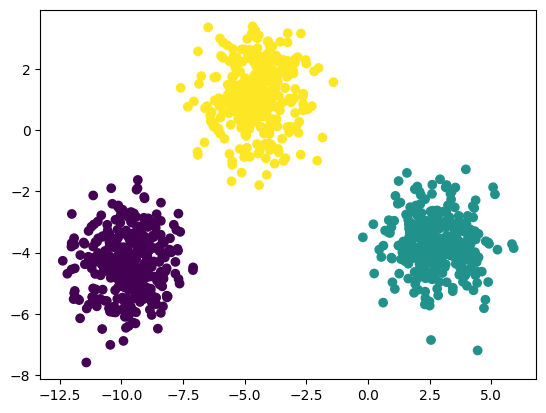

In [6]:
plt.scatter(x[:,0],x[:,1],c=y)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [10]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [11]:
from sklearn.cluster import KMeans

In [ ]:
## Elbow method to select K values 
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[1340.0000000000002,
 700.6047963291554,
 119.04797996899863,
 97.04838526018679,
 81.7271906188789,
 59.13934361985673,
 53.46040472341269,
 46.51808554908273,
 40.699750468911034,
 40.14496262623864]

Text(0, 0.5, 'WCSS')

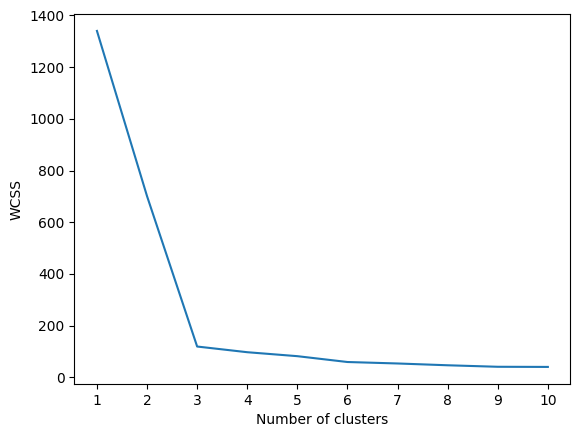

In [14]:
## plot elbow curve 
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [16]:
kmeans=KMeans(n_clusters=3,init="k-means++")
kmeans.fit_predict(x_train_scaled)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 0, 2, 1, 1,
       1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2,
       1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0,
       2, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 1, 0,
       2, 2, 2, 1, 0, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0,
       0, 1, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2,
       0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 0, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2,
       0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2,
       2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0,
       1, 2, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 2,

In [18]:
y_pred=kmeans.predict(x_test_scaled)
y_pred

array([0, 1, 2, 0, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1,
       0, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 1, 0, 2, 0, 0,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 1,
       0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1, 2,
       2, 1, 2, 2, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       1, 2, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2,
       2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 1, 0,
       1, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2,
       2, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2,
       1, 1, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 2, 2, 0, 1, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0,

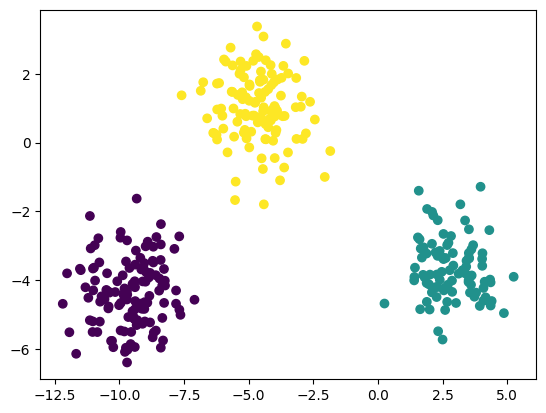

In [19]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)

### Validating the k value 
#### Knee Locator
#### Silhoutee scoring

In [20]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [21]:
kl.elbow

np.int64(3)

In [23]:
## Silhoutte score 
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train_scaled)
    score=silhouette_score(x_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [24]:
silhouette_coefficients

[np.float64(0.5390571936406234),
 np.float64(0.7664724351822061),
 np.float64(0.6520205229778545),
 np.float64(0.5599938478448386),
 np.float64(0.4125815475160187),
 np.float64(0.3874375013187477),
 np.float64(0.40086391435793134),
 np.float64(0.3756553097272289),
 np.float64(0.36535213427486163)]

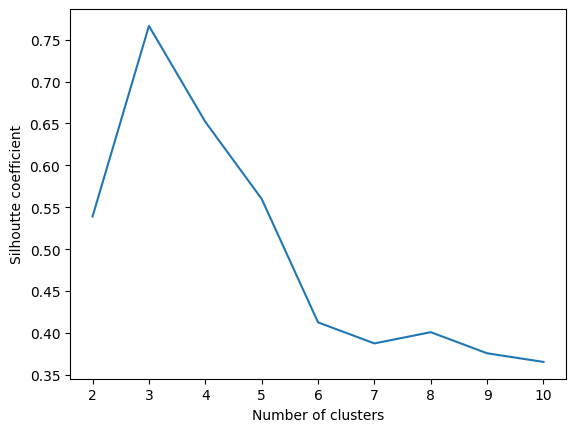

In [25]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutte coefficient")
plt.show()